<a href="https://colab.research.google.com/github/EddersonPR/challenge-telecom-x/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚 Bibliotecas y librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
import json
import datetime
import chardet
from scipy.stats import pointbiserialr

#📌 Extracción

In [2]:
enlaceApi = 'https://github.com/alura-cursos/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json' # -> Enlace web, razón por lo que no es posible leer directamente
enlace_raw_data = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json' # -> Servidor de contenido crudo de GitHub (JSON puro) y permite acceder y leer el archivo

In [3]:
# Requests para obtener la respuesta de la URL
acceso = requests.get(enlace_raw_data)
json_nativo = json.loads(acceso.text)
df = pd.DataFrame(json_nativo) # Pasamos a df como un auxiliar para explorar
df.head(2) #


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [4]:
df = pd.json_normalize(json_nativo) # Normalizamos la dataset
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
# Prefijos a eliminar
prefijos = ['customer.', 'phone.', 'internet.', 'account.', 'Charges.']

# Listas para el mapeo (emparejamiento)
nombres_actuales = []
nombres_limpios = []

# Iterar sobre las columnas del DataFrame
for col in df.columns:
    es_prefijo = False

    # Verificar si la columna comienza con alguno de los prefijos
    for prefijo in prefijos:
        if col.startswith(prefijo):
            nombres_actuales.append(col)
            # Eliminar el prefijo para obtener el nombre limpio
            nombres_limpios.append(col.replace(prefijo, '', 1))
            es_prefijo = True
            break

    # Si la columna no tiene prefijo (ej: customerID, Churn), se mantiene igual
    if not es_prefijo:
        nombres_actuales.append(col)
        nombres_limpios.append(col)


# Usar zip() para crear el diccionario de mapeo
# Empareja (zip) los nombres actuales con los nombres limpios
mapeo_renombre = dict(zip(nombres_actuales, nombres_limpios))

# Renombrado con .rename()
# Le pasamos el diccionario de mapeo generado por zip
df = df.rename(columns=mapeo_renombre)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [6]:
df.columns.tolist() # Visualizamos los nombres de los encabezados en lista

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

In [7]:
# Direccionario de nombre de columnas en español para su modificación
columnas_es = [
    'ID_Cliente',
    'Desercion',
    'Genero',
    'Adulto_Mayor',
    'Pareja',
    'Dependientes',
    'Antiguedad_Meses',
    'Servicio_Telefono',
    'Lineas_Multiples',
    'Servicio_Internet',
    'Seguridad_Online',
    'Respaldo_Online',
    'Proteccion_Dispositivo',
    'Soporte_Tecnico',
    'TV_Streaming',
    'Peliculas_Streaming',
    'Tipo_Contrato',
    'Facturacion_Sin_Papel',
    'Metodo_Pago',
    'Cargo_Mensual',
    'Cargo_Total'
]

In [8]:
## Modificación de columnas
mapping = dict(zip(df.columns, columnas_es))
df = df.rename(columns=mapping)
df.head()

,ID_Cliente,Desercion,Genero,Adulto_Mayor,Pareja,Dependientes,Antiguedad_Meses,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,...,Respaldo_Online,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Facturacion_Sin_Papel,Metodo_Pago,Cargo_Mensual,Cargo_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [9]:
# Identificamos si hay valores vacios
columnas_con_vacios = [
    col for col in df.columns
    if df[col].astype(str).str.strip().eq('').any()
]
print("Columnas con vacíos:", columnas_con_vacios)

Columnas con vacíos: ['Desercion', 'Cargo_Total']


In [10]:
# Reemplazar '', ' ', '   ' → np.nan en TODAS las columnas string
df = df.replace(r'^\s*$', np.nan, regex=True)

In [11]:
df['Cargo_Total'] = pd.to_numeric(df['Cargo_Total'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7267 non-null   object 
 1   Desercion               7043 non-null   object 
 2   Genero                  7267 non-null   object 
 3   Adulto_Mayor            7267 non-null   int64  
 4   Pareja                  7267 non-null   object 
 5   Dependientes            7267 non-null   object 
 6   Antiguedad_Meses        7267 non-null   int64  
 7   Servicio_Telefono       7267 non-null   object 
 8   Lineas_Multiples        7267 non-null   object 
 9   Servicio_Internet       7267 non-null   object 
 10  Seguridad_Online        7267 non-null   object 
 11  Respaldo_Online         7267 non-null   object 
 12  Proteccion_Dispositivo  7267 non-null   object 
 13  Soporte_Tecnico         7267 non-null   object 
 14  TV_Streaming            7267 non-null   

In [12]:
# Detectar columnas con valores NaN después del reemplazo
columnas_nulas = df.columns[df.isnull().any()].tolist()
print("Columnas con nulls:", columnas_nulas)

Columnas con nulls: ['Desercion', 'Cargo_Total']


In [13]:
for col in columnas_nulas:
    nulos = df[col].isnull().sum()
    porcentaje = df[col].isnull().mean() * 100

    print(f"Columna: {col}")
    print(f" - Cantidad de nulos: {nulos:,}")
    print(f" - Porcentaje: {porcentaje:.4f}%\n")


Columna: Desercion
 - Cantidad de nulos: 224
 - Porcentaje: 3.0824%

Columna: Cargo_Total
 - Cantidad de nulos: 11
 - Porcentaje: 0.1514%



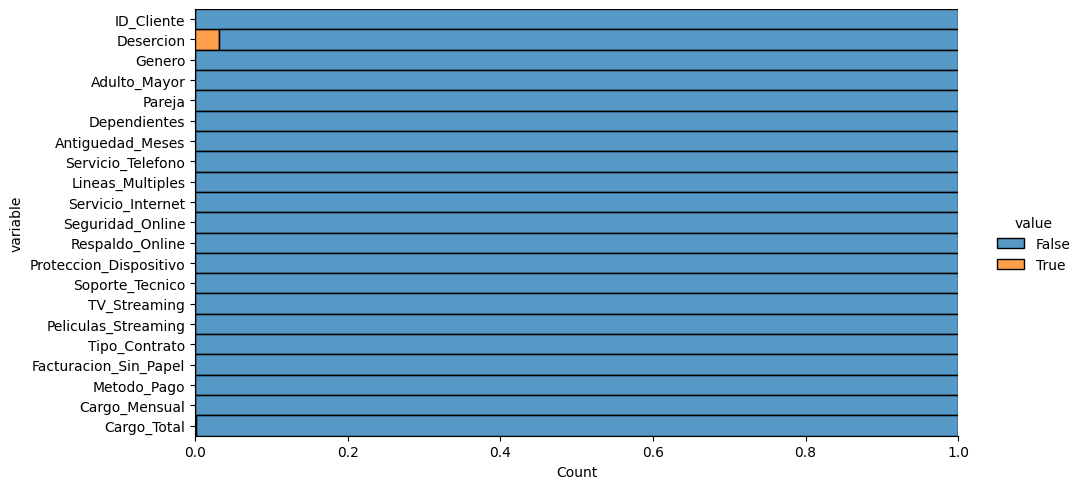

In [14]:
df_validacion = df.isnull().melt()
sns.displot(data=df_validacion, y='variable', hue='value', multiple='fill', aspect=2)
plt.show() ## Gráfico que nos permite visualizar datos faltantes

In [15]:
# Eliminar registros vacios o nulls
df = df.dropna(subset=['Cargo_Total', 'Desercion'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7032 non-null   object 
 1   Desercion               7032 non-null   object 
 2   Genero                  7032 non-null   object 
 3   Adulto_Mayor            7032 non-null   int64  
 4   Pareja                  7032 non-null   object 
 5   Dependientes            7032 non-null   object 
 6   Antiguedad_Meses        7032 non-null   int64  
 7   Servicio_Telefono       7032 non-null   object 
 8   Lineas_Multiples        7032 non-null   object 
 9   Servicio_Internet       7032 non-null   object 
 10  Seguridad_Online        7032 non-null   object 
 11  Respaldo_Online         7032 non-null   object 
 12  Proteccion_Dispositivo  7032 non-null   object 
 13  Soporte_Tecnico         7032 non-null   object 
 14  TV_Streaming            7032 non-null   objec

In [16]:
df.nunique()

,0
ID_Cliente,7032
Desercion,2
Genero,2
Adulto_Mayor,2
Pareja,2
Dependientes,2
Antiguedad_Meses,72
Servicio_Telefono,2
Lineas_Multiples,3
Servicio_Internet,3


In [17]:
columnas_object = df.select_dtypes(include='object').columns.tolist()
print(columnas_object)

['ID_Cliente', 'Desercion', 'Genero', 'Pareja', 'Dependientes', 'Servicio_Telefono', 'Lineas_Multiples', 'Servicio_Internet', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'TV_Streaming', 'Peliculas_Streaming', 'Tipo_Contrato', 'Facturacion_Sin_Papel', 'Metodo_Pago']


In [18]:
columnas_object = df.select_dtypes(include='object').columns

for col in columnas_object:
    print(f"\n Columna: {col}")
    print(df[col].value_counts())



 Columna: ID_Cliente
ID_Cliente
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
             ..
0018-NYROU    1
0017-IUDMW    1
0017-DINOC    1
0016-QLJIS    1
0015-UOCOJ    1
Name: count, Length: 7032, dtype: int64

 Columna: Desercion
Desercion
No     5163
Yes    1869
Name: count, dtype: int64

 Columna: Genero
Genero
Male      3549
Female    3483
Name: count, dtype: int64

 Columna: Pareja
Pareja
No     3639
Yes    3393
Name: count, dtype: int64

 Columna: Dependientes
Dependientes
No     4933
Yes    2099
Name: count, dtype: int64

 Columna: Servicio_Telefono
Servicio_Telefono
Yes    6352
No      680
Name: count, dtype: int64

 Columna: Lineas_Multiples
Lineas_Multiples
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

 Columna: Servicio_Internet
Servicio_Internet
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

 Columna: Seguridad_Online
Seguridad_Online
No    

In [19]:
cols_texto = ['Metodo_Pago', 'Genero', 'Tipo_Contrato',
              'Pareja', 'Desercion', 'Dependientes',
              'Servicio_Telefono', 'Facturacion_Sin_Papel']

df[cols_texto] = df[cols_texto].apply(
    lambda col: col.astype(str).str.strip()
)

map_traducciones = {
    'Metodo_Pago': {
        'Electronic check': 'Cheque Electrónico',
        'Mailed check': 'Cheque por Correo',
        'Bank transfer (automatic)': 'Transferencia Bancaria',
        'Credit card (automatic)': 'Tarjeta de Crédito'
    },
    'Genero': {
        'Male': 'Masculino',
        'Female': 'Femenino'
    },
    'Tipo_Contrato': {
        'Month-to-month': 'Mensual',
        'Two year': '2 Años',
        'One year': '1 Año'
    }
}

for col, mapa in map_traducciones.items():
    df[col] = df[col].replace(mapa)

df.head()

,ID_Cliente,Desercion,Genero,Adulto_Mayor,Pareja,Dependientes,Antiguedad_Meses,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,...,Respaldo_Online,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Facturacion_Sin_Papel,Metodo_Pago,Cargo_Mensual,Cargo_Total
0,0002-ORFBO,No,Femenino,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,1 Año,Yes,Cheque por Correo,65.6,593.30
1,0003-MKNFE,No,Masculino,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Mensual,No,Cheque por Correo,59.9,542.40
2,0004-TLHLJ,Yes,Masculino,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Mensual,Yes,Cheque Electrónico,73.9,280.85
3,0011-IGKFF,Yes,Masculino,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Mensual,Yes,Cheque Electrónico,98.0,1237.85
4,0013-EXCHZ,Yes,Femenino,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Mensual,Yes,Cheque por Correo,83.9,267.40


In [20]:
map_binario = {'No': 0, 'Si': 1, 'Yes': 1}

cols_binarias = [
    'Pareja', 'Desercion', 'Dependientes',
    'Servicio_Telefono', 'Facturacion_Sin_Papel'
]

df[cols_binarias] = (
    df[cols_binarias]
        .replace(map_binario)
        .infer_objects(copy=False)
        .astype('Int64')
)

df.head(2)

/tmp/ipython-input-2148577383.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(map_binario)


,ID_Cliente,Desercion,Genero,Adulto_Mayor,Pareja,Dependientes,Antiguedad_Meses,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,...,Respaldo_Online,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Facturacion_Sin_Papel,Metodo_Pago,Cargo_Mensual,Cargo_Total
0,0002-ORFBO,0,Femenino,0,1,1,9,1,No,DSL,...,Yes,No,Yes,Yes,No,1 Año,1,Cheque por Correo,65.6,593.3
1,0003-MKNFE,0,Masculino,0,0,0,9,1,Yes,DSL,...,No,No,No,No,Yes,Mensual,0,Cheque por Correo,59.9,542.4


#📊 Carga y análisis

## Análisis General

### Distribución por género

In [21]:
# Distribución del género
frecuencia_genero = df['Genero'].value_counts()
porcentaje = df['Genero'].value_counts(normalize=True) * 100

resumen = pd.DataFrame({
    'Total': frecuencia_genero,
    'Porcentaje': porcentaje
})

resumen['Total'] = resumen['Total'].apply(lambda x: f'{x:,.0f}')
resumen['Porcentaje'] = resumen['Porcentaje'].apply(lambda x: f'{x:,.2f} %')

resumen

,Total,Porcentaje
Genero,,
Masculino,"3,549",50.47 %
Femenino,"3,483",49.53 %


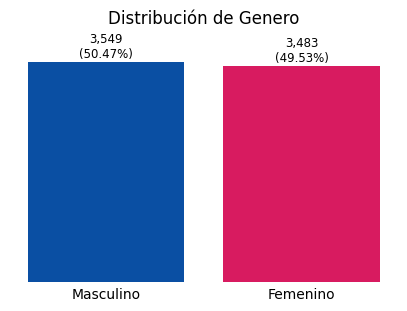

In [22]:
# Dataframe
frecuencia_genero = df['Genero'].value_counts()
porcentaje = df['Genero'].value_counts(normalize=True) * 100

colores = ['#0A4FA3', '#d81b60']  # Colores asignados para cada barra

fig, ax = plt.subplots(figsize=(5,3))  # Creamos la figura y los ejes con tamaño definido

ax.set_frame_on(False)  # Ocultamos el marco del gráfico
ax.tick_params(axis='x', which = 'both', size = 0) # Quitamos los ticks del eje X

ax.bar(frecuencia_genero.index, frecuencia_genero.values, color=colores)  # Dibujamos las barras

ax.set_title('Distribución de Genero', pad=20)  # Título con separación ajustada
ax.set_yticks([])  # Quitamos las marcas y etiquetas del eje Y


# Añadimos etiquetas numéricas encima de cada barra
for i, (total, pct) in enumerate(zip(frecuencia_genero.values, porcentaje.values)):
    ax.text(i, total + 30,
            f'{total:,.0f}\n({pct:.2f}%)',          # Ubicación y formato del valor
            color='black', fontsize=8.5,
            ha='center', va='bottom')

plt.show()

### Proporción de clientes según perfil etario

In [23]:
# Distribución de perfil
distribucion_demografico = df['Adulto_Mayor'].value_counts()
porcentajes = df['Adulto_Mayor'].value_counts(normalize=True) * 100

# Construir DataFrame base
resumen = pd.DataFrame({
    'Total': distribucion_demografico,
    'Porcentaje': porcentajes.round(2)
})

# Formatear columnas de salida
resumen['Porcentaje'] = resumen['Porcentaje'].apply(lambda x: f"{x:,.2f} %")
resumen['Total'] = resumen['Total'].apply(lambda x: f"{x:,.0f}")
resumen.index.name = 'Adulto Mayor'

resumen

,Total,Porcentaje
Adulto Mayor,,
0,"5,890",83.76 %
1,"1,142",16.24 %


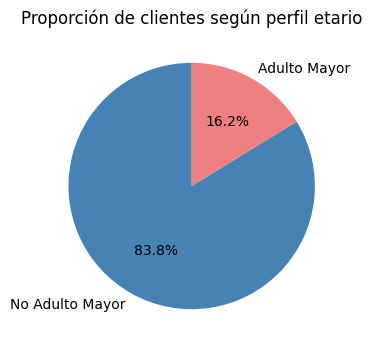

In [24]:
# Distribución de perfil
distribucion_demografico = df['Adulto_Mayor'].value_counts()

# Crear etiquetas legibles
etiquetas = ['No Adulto Mayor' if x == 0 else 'Adulto Mayor' for x in distribucion_demografico.index]

colores = ['steelblue', 'lightcoral']

plt.figure(figsize=(4,4))
plt.pie(
    distribucion_demografico,
    autopct='%1.1f%%',
    labels=etiquetas,
    colors=colores,
    startangle=90
)

plt.title('Proporción de clientes según perfil etario')

#plt.legend(etiquetas, title="Categoría", )
plt.show()


#### Conclusiones:
- Los adultos mayores solo representa un total de 16%.

### Distribución de clientes según convivencia (vive solo vs. en pareja)

In [25]:
# Distribución de Socio (Partner)
distribucion_socio = df['Pareja'].value_counts()
porcentajes = df['Pareja'].value_counts(normalize=True) * 100

# Construir DataFrame base
resumen = pd.DataFrame({
    'Total': distribucion_socio,
    'Porcentaje': porcentajes.round(2)
})

# Formatear columnas de salida
resumen['Porcentaje'] = resumen['Porcentaje'].apply(lambda x: f"{x:,.2f} %")
resumen['Total'] = resumen['Total'].apply(lambda x: f"{x:,.0f}")
resumen.index.name = 'Pareja'

resumen

,Total,Porcentaje
Pareja,,
0,"3,639",51.75 %
1,"3,393",48.25 %


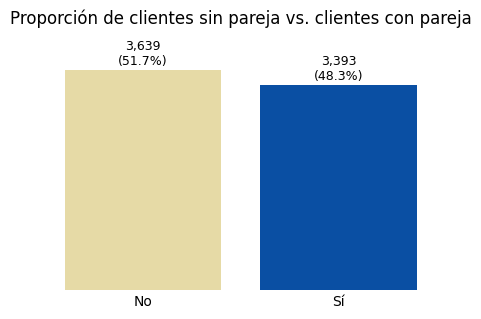

In [26]:
# Conteo
socio = df['Pareja'].value_counts()

# Reemplazar etiquetas del índice
socio.index = socio.index.map({0: 'No', 1: 'Sí'})

# Porcentajes alineados con socio
porcentaje = (socio / socio.sum()) * 100

# Colores
colores = ['#e6daa6', '#0A4FA3']

# Gráfico
fig, ax = plt.subplots(figsize=(5,3))
ax.set_frame_on(False)
ax.tick_params(axis='x', which='both', size=0) # Quitamos los ticks del eje x

ax.bar(socio.index, socio.values, color=colores)
ax.set_title('Proporción de clientes sin pareja vs. clientes con pareja', pad=25)
ax.set_yticks([])

# Etiquetas
for i, (total, pct) in enumerate(zip(socio.values, porcentaje.values)):
    ax.text(
        i, total + 30,
        f'{total:,.0f}\n({pct:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.show()

#### Conclusiones:
- Clientes individuales representa casi el 52% de total de datos y solo el 48% clientes con pareja o asociado

<!-- ### Distribución de Antiguedad -->

### Distribución por Antiguedad

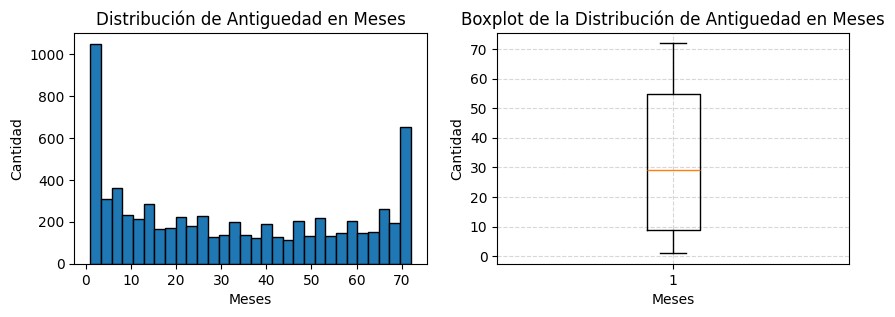

In [27]:
# Crea la Figura y los Ejes. Inicializa un lienzo (fig) y una matriz de Ejes (axs) con 1 fila y 2 columnas. El tamaño de la figura es de 12 con 4 pulgadas.
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].hist(df['Antiguedad_Meses'], bins=30, edgecolor="black")
axs[0].set_title('Distribución de Antiguedad en Meses')
axs[0].set_xlabel('Meses')
axs[0].set_ylabel('Cantidad')

axs[1].boxplot(df['Antiguedad_Meses'])
axs[1].set_title('Boxplot de la Distribución de Antiguedad en Meses')
axs[1].set_xlabel('Meses')
axs[1].set_ylabel('Cantidad')
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.show()

#### Conclusiones:
- El histograma nos indica que la antigüedad tiene una distribución bimodal con una forma de U, lo que significa que no es simétrica. La mayoría de las personas se concentran en los extremos: nuevos (Antigüedad ~0) y antiguos (Antigüedad ~70), mientras que el grupo intermedio es el menos numeroso.

- El rango intercuartílico (la caja) es muy amplio, cubriendo una gran parte del rango total de antigüedad (casi todo el rango central de 10 a 55). Esto indica una alta dispersión de los datos.

### Distribución por Recarga Mensual

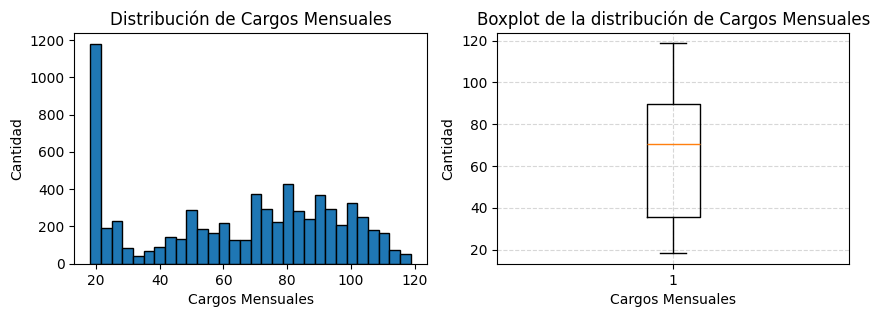

In [28]:
# Crea la Figura y los Ejes. Inicializa un lienzo (fig) y una matriz de Ejes (axs) con 1 fila y 2 columnas. El tamaño de la figura es de 12 con 4 pulgadas.
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].hist(df['Cargo_Mensual'], bins=30, edgecolor="black")
axs[0].set_title('Distribución de Cargos Mensuales')
axs[0].set_xlabel('Cargos Mensuales')
axs[0].set_ylabel('Cantidad')

axs[1].boxplot(df['Cargo_Mensual'])
axs[1].set_title('Boxplot de la distribución de Cargos Mensuales')
axs[1].set_xlabel('Cargos Mensuales')
axs[1].set_ylabel('Cantidad')
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.show()

#### Conclusiones:
- La empresa tiene una gran base de clientes que solo consumen el servicio básico (recargas bajas), pero también mantiene una cantidad significativa de clientes con una amplia gama de consumos medios y altos.

- La mediana (70) está mucho más cerca del tercer cuartil (90), lo cual es una señal clara de la asimetría negativa que ya vimos en el histograma.

### Distribución de Recargas Totales

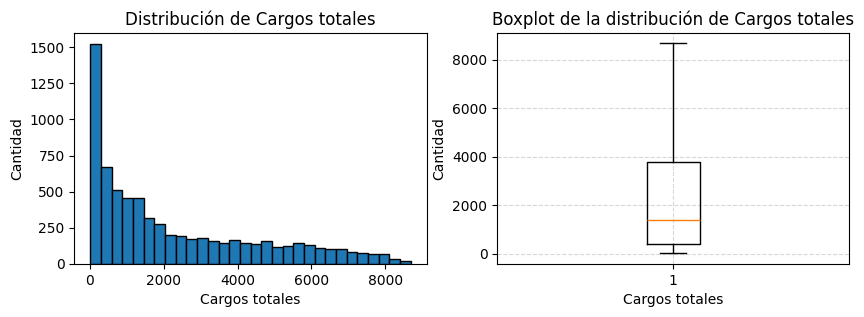

In [29]:
# Crea la Figura y los Ejes. Inicializa un lienzo (fig) y una matriz de Ejes (axs) con 1 fila y 2 columnas. El tamaño de la figura es de 12 con 4 pulgadas.
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].hist(df['Cargo_Total'], bins=30, edgecolor="black")
axs[0].set_title('Distribución de Cargos totales')
axs[0].set_xlabel('Cargos totales')
axs[0].set_ylabel('Cantidad')

axs[1].boxplot(df['Cargo_Total'])
axs[1].set_title('Boxplot de la distribución de Cargos totales')
axs[1].set_xlabel('Cargos totales')
axs[1].set_ylabel('Cantidad')
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.show()

## Análisis de Abandono (Churn) Profundizado

### ¿Cómo se distribuye la base de clientes entre desertores y no desertores?

In [30]:
total = df['Desercion'].value_counts()
total_porcentaje = df['Desercion'].value_counts(normalize=True)*100

resultados = pd.DataFrame({
    'Total': total,
    'Porcentaje': total_porcentaje
})

resultados['Total'] = resultados['Total'].apply(lambda x: f'{x:,.0f}')
resultados['Porcentaje'] = resultados['Porcentaje'].apply(lambda x: f'{x:.1f}%')

resultados.index.name = 'Desercion'

resultados

,Total,Porcentaje
Desercion,,
0,"5,163",73.4%
1,"1,869",26.6%


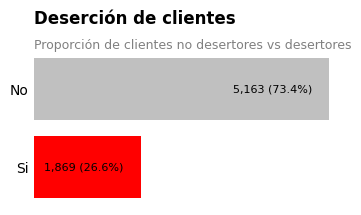

In [31]:
# Dataframe a gráficar
df_churn = (
    df['Desercion']
    .value_counts()
    .rename_axis('Desercion')
    .reset_index(name='Total')
)

df_churn['Desercion'] = df_churn['Desercion'].astype('object')

df_churn['Porcentaje'] = df_churn['Total'] / df_churn['Total'].sum() * 100
df_churn['Desercion'] = df_churn['Desercion'].replace({0: 'No', 1: 'Si'})
df_churn = df_churn.sort_values('Total', ascending=True)

# Colores, resaltamos el Si
colores = []
for desercion in df_churn['Desercion']:
  if desercion == 'Si':
    colores.append('red')
  else:
    colores.append('silver')

#Gráfico
fig, ax = plt.subplots(figsize=(4,2)) # Definimos el tamaño del lienzo

ax.set_frame_on(False)    # Oculta el marco del gráfico
ax.xaxis.set_visible(False)                    # Oculta el eje X completo
ax.tick_params(axis='y', which='both', size=0) # Quitamos los ticks del eje Y

ax.barh(df_churn['Desercion'],df_churn['Total'], color=colores)
ax.set_title('Deserción de clientes', fontsize=12, weight='bold', pad=20, loc='left')
ax.text(
    0.0, 1.02,
    'Proporción de clientes no desertores vs desertores',
    transform=ax.transAxes,
    ha='left',
    fontsize=9,
    color='gray'
)


# Etiquetas en cada barra
for i, (total, pct) in enumerate(zip(df_churn['Total'], df_churn['Porcentaje'])):
    ax.text(
        total - 300,        # X → al final de la barra
        i,                 # Y → posición de la barra
        f'{total:,.0f} ({pct:.1f}%)',
        va='center',
        ha='right',
        fontsize=8,
        color='black'
    )

#Guardar Gráfico como PNG
#fig.savefig(url, transparent=False, dpi=300, bbox_inches='tight')

plt.show()


### ¿Los clientes que desertan tienen menor antigüedad que el promedio general?

In [32]:
desertores = df.loc[df['Desercion'] == 1, 'Antiguedad_Meses'].describe()
general = df['Antiguedad_Meses'].describe()

resumen = pd.concat(
    [desertores, general],
    axis=1,
    keys=['Desertores', 'General']
).reset_index().rename(columns={'index': 'Descripción'})


resumen

,Descripción,Desertores,General
0,count,1869.000000,7032.000000
1,mean,17.979133,32.421786
2,std,19.531123,24.545260
3,min,1.000000,1.000000
4,25%,2.000000,9.000000
5,50%,10.000000,29.000000
6,75%,29.000000,55.000000
7,max,72.000000,72.000000


#### Observaciones Desertores:
- El 50% de los clientes que abandonan lo hace antes de cumplir 10 meses, mientras que el cliente típico de la base general permanece casi 2 años y medio.

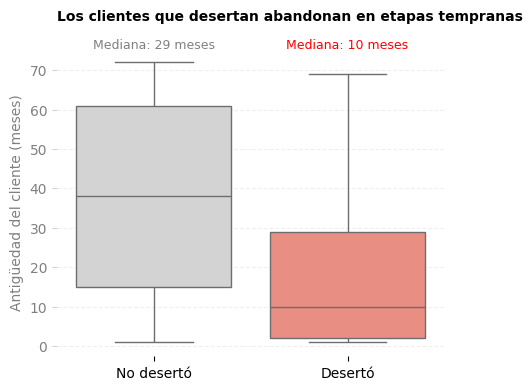

In [33]:
plt.figure(figsize=(5,4))

df['Desercion_label'] = df['Desercion'].map({0: 'No desertó', 1: 'Desertó'})

sns.boxplot(
    data=df,
    x='Desercion_label',
    y='Antiguedad_Meses',
    hue='Desercion_label',
    palette={'No desertó': 'lightgray', 'Desertó': 'salmon'},
    showfliers=False,
    legend=False
)

plt.xticks([0,1], ['No desertó', 'Desertó'])

plt.title(
    'Los clientes que desertan abandonan en etapas tempranas',
    fontsize=10,
    weight='bold',
    loc='left',
    pad=20
)

plt.text(
    0, df['Antiguedad_Meses'].max() * 1.05,
    'Mediana: 29 meses',
    ha='center',
    fontsize=9,
    color='gray'
)

plt.text(
    1, df['Antiguedad_Meses'].max() * 1.05,
    'Mediana: 10 meses',
    ha='center',
    fontsize=9,
    color='red'
)

plt.ylabel('Antigüedad del cliente (meses)', color='gray')
plt.yticks(color='gray')
plt.tick_params(axis='y', color='lightgray')
plt.xlabel('')

plt.grid(axis='y', linestyle='--', alpha=0.2)
sns.despine(left=True, bottom=True)

plt.show()


#### Insights:
- La deserción ocurre principalmente en los primeros meses del cliente.
Los clientes que abandonan tienen una antigüedad media 44% menor y una mediana 65% menor que la base general, lo que evidencia una fuerte relación entre antigüedad y probabilidad de abandono.

In [34]:
corr, p_value = pointbiserialr(
    df['Desercion'],           # binaria (0/1)
    df['Antiguedad_Meses']     # numérica
)

corr, p_value

(np.float64(-0.354049358953251), np.float64(9.437650217577492e-207))

### Interpretación:
- Relación inversa entre las variables (−):
  - A mayor antigüedad del cliente, menor probabilidad de deserción.
- Magnitud (|r| = 0.35): Correlación negativa moderada.
- p-value ≈ 0 (9.43 × 10⁻²⁰⁷): La relación es estadísticamente significativa y no atribuible al azar.
- **p indica si existe relación (no es azar); r indica qué tan fuerte es y en qué sentido.**

**Conclusión:**
La antigüedad del cliente presenta una relación negativa moderada con la deserción, altamente significativa desde el punto de vista estadístico.

In [35]:
labels = [
    '0–6 meses',
    '7–12 meses',
    '13–24 meses',
    '25–36 meses',
    '37–48 meses',
    '49–72 meses'
]

df['Antiguedad_bin'] = pd.cut(
    df['Antiguedad_Meses'],
    bins=[0, 6, 12, 24, 36, 48, 72],
    labels=labels,
    right=True,
    include_lowest=True
)

churn_rate = (
    df.groupby('Antiguedad_bin', observed=True)['Desercion']
      .mean()
      .reset_index()
)

churn_rate


,Antiguedad_bin,Desercion
0,0–6 meses,0.533333
1,7–12 meses,0.358865
2,13–24 meses,0.287109
3,25–36 meses,0.216346
4,37–48 meses,0.190289
5,49–72 meses,0.095132


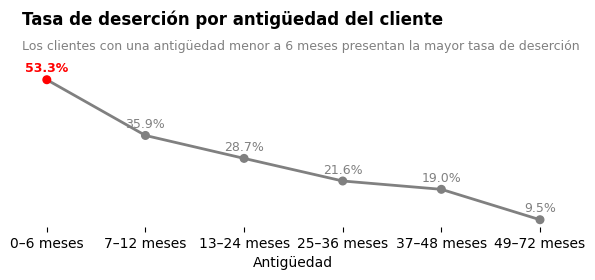

In [36]:
# Colores para cada punto
colorMarcador = [
    'red' if tasa == churn_rate['Desercion'].max() else 'gray'
    for tasa in churn_rate['Desercion']
]

fig, ax = plt.subplots(figsize=(7,2))
ax.set_frame_on(False) # Quita el marco del gráfico
ax.yaxis.set_visible(False)  # Quita las etiquetas del eje Y
ax.tick_params(axis='y', which='both', size=0) # Quita las marcas (ticks) del eje

# Línea
ax.plot(
    churn_rate['Antiguedad_bin'].astype(str),
    churn_rate['Desercion'],
    color='gray',
    linewidth=2,
    zorder=1
)

# Puntos
ax.scatter(
    churn_rate['Antiguedad_bin'].astype(str),
    churn_rate['Desercion'],
    color=colorMarcador,
    s=30,
    zorder=2
)

# Punto máximo
#max_row = churn_rate.loc[churn_rate['Desercion'].idxmax()]
#ax.annotate(
    #f'Máx: {max_row["Desercion"]:.1%}',
    #xy=(str(max_row['Antiguedad_bin']), max_row['Desercion']),
    #xytext=(0,10),
    #textcoords='offset points',
    #ha='center',
    #fontsize=9,
    #color='red'
#)

for _, row in churn_rate.iterrows():
    es_max = row['Desercion'] == churn_rate['Desercion'].max()

    ax.text(
        str(row['Antiguedad_bin']),
        row['Desercion'] + 0.015,
        f"{row['Desercion']:.1%}",
        ha='center',
        va='bottom',
        fontsize=9,
        color='red' if es_max else 'gray',
        fontweight='bold' if es_max else 'normal',
        zorder=3
    )


ax.set_title(
    'Tasa de deserción por antigüedad del cliente',
    pad=35,
    fontsize=12,
    weight='bold',
    loc='left'
)

ax.text(
    0.0, 1.15,
    'Los clientes con una antigüedad menor a 6 meses presentan la mayor tasa de deserción',
    transform=ax.transAxes,
    ha='left',
    fontsize=9,
    color='gray'
)

ax.set_ylabel('Tasa de deserción')
ax.set_xlabel('Antigüedad')
ax.grid(axis='y', linestyle='--', alpha=0.2)

plt.show()

### ¿Los clientes mayores tienen una propensión mucho mayor al abandono?

In [37]:
tabla_propension = (
    df.groupby('Adulto_Mayor')['Desercion']
      .value_counts(normalize=True)
      .unstack()
)

tabla_propension.index = tabla_propension.index.map({
    0: 'No Adulto Mayor',
    1: 'Adulto Mayor'
})

tabla_propension.columns = ['No Desertó', 'Desertó']

tabla_propension

,No Desertó,Desertó
Adulto_Mayor,,
No Adulto Mayor,0.763497,0.236503
Adulto Mayor,0.583187,0.416813


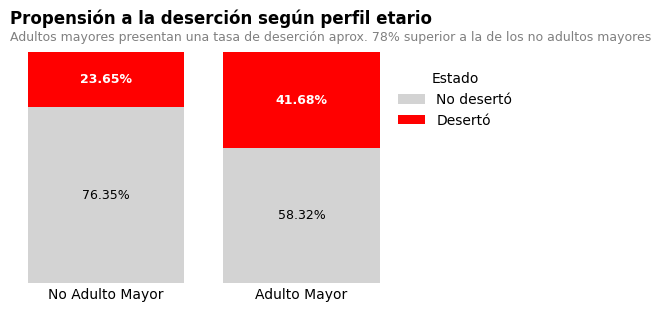

In [38]:
fig, ax = plt.subplots(figsize=(5,3))

# Valores
no_deserto = tabla_propension['No Desertó']
deserto = tabla_propension['Desertó']

# Barras apiladas
ax.bar(
    tabla_propension.index,
    no_deserto,
    color='lightgray',
    label='No desertó'
)

ax.bar(
    tabla_propension.index,
    deserto,
    bottom=no_deserto,
    color='red',
    label='Desertó'
)

# Estilo ejecutivo
ax.set_frame_on(False)
ax.set_ylim(0, 1)
#ax.set_yticks([0, 0.5, 1])
#ax.set_yticklabels(['0%', '50%', '100%'])
ax.yaxis.set_visible(False)                    # Oculta el eje y completo
ax.tick_params(axis='y', which='both', size=0) # Quitamos los ticks del eje Y
ax.tick_params(axis='x', which='both', size=0) # Quitamos los ticks del eje Y

ax.set_title(
    'Propensión a la deserción según perfil etario',
    loc='left',
    weight='bold',
    pad=20
)

ax.text(
    0.0, 1.05,
    'Adultos mayores presentan una tasa de deserción aprox. 78% superior a la de los no adultos mayores',
    transform=ax.transAxes,
    ha='left',
    fontsize=9,
    color='gray'
)

for i, perfil in enumerate(tabla_propension.index):
    ax.text(
        i,
        # Posición Y: Mitad de la barra 'Desertó'
        no_deserto.iloc[i] + deserto.iloc[i] / 2,
        # Texto: Porcentaje de 'Desertó'
        f'{deserto.iloc[i]*100:.2f}%',
        ha='center',
        va='center',
        fontsize=9,
        color='white',
        weight='bold' # Ya estaba en negrita
    )

    # 2. Etiquetas de "No Desertó"
    ax.text(
        i,
        # Posición Y: Mitad de la barra 'No Desertó'
        no_deserto.iloc[i] / 2,
        # Texto: Porcentaje de 'No Desertó'
        f'{no_deserto.iloc[i]*100:.2f}%',
        ha='center',
        va='center',
        fontsize=9,
        color='black', # Color negro para contraste
    )


ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.legend(title='Estado', frameon=False, bbox_to_anchor=(0.95, 1), loc='upper left', borderaxespad=1.)

plt.show()


### ¿El género es un factor de riesgo?.

In [39]:
genero_propension = (
    df.groupby('Genero')['Desercion']
      .value_counts(normalize=True)
      .unstack()
)

genero_propension.columns = ['No Desertó', 'Desertó']

(
    genero_propension
    .style
    .format('{:.2%}')
    .set_caption('Propensión a la deserción por género')

    # Heatmap suave SOLO en Desertó
    .background_gradient(
        subset=['Desertó'],
        cmap='Reds',
        low=0.2,
        high=0.6
    )

    # Estilo general de celdas
    .set_properties(**{
        'text-align': 'center',
        'font-size': '11px'
    })

    # Estilos CSS
    .set_table_styles([
        {
            'selector': 'caption',
            'props': [
                ('font-size', '13px'),
                ('font-weight', 'bold'),
                ('text-align', 'left'),
                ('margin-bottom', '10px')
            ]
        },
        {
            'selector': 'th',
            'props': [
                ('background-color', '#f7f7f7'),
                ('font-weight', 'bold'),
                ('text-align', 'center'),
                ('font-size', '11px')
            ]
        },
        {
            'selector': 'td',
            'props': [
                ('border', '1px solid #eeeeee')
            ]
        }
    ])
)


,No Desertó,Desertó
Genero,,
Femenino,73.04%,26.96%
Masculino,73.80%,26.20%


#### Insight Genero:
- La propensión a la deserción es prácticamente equivalente entre hombres y mujeres, por lo que el género no es un factor diferenciador relevante.

### ¿Los clientes con Pareja abandonan menos?

In [40]:
pareja_propension = (
    df.groupby('Pareja')['Desercion']
      .value_counts(normalize=True)
      .unstack()
)

pareja_propension.index = pareja_propension.index.map({
    0: 'Sin Pareja',
    1: 'Con Pareja'
})

pareja_propension.columns = ['No Desertó', 'Desertó']

pareja_propension

,No Desertó,Desertó
Pareja,,
Sin Pareja,0.670239,0.329761
Con Pareja,0.802829,0.197171


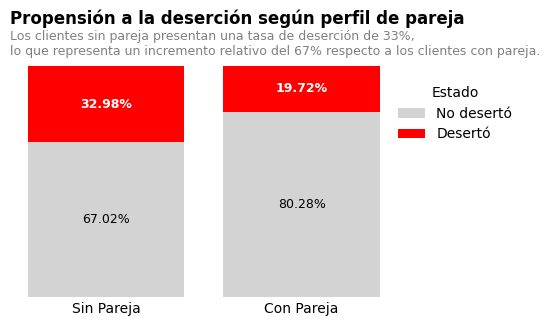

In [41]:
fig, ax = plt.subplots(figsize=(5,3))

# Valores
no_deserto = pareja_propension['No Desertó']
deserto = pareja_propension['Desertó']

# Barras apiladas
ax.bar(
    pareja_propension.index,
    no_deserto,
    color='lightgray',
    label='No desertó'
)

ax.bar(
    pareja_propension.index,
    deserto,
    bottom=no_deserto,
    color='red',
    label='Desertó'
)

# Estilo ejecutivo
ax.set_frame_on(False)
ax.set_ylim(0, 1)
#ax.set_yticks([0, 0.5, 1])
#ax.set_yticklabels(['0%', '50%', '100%'])
ax.yaxis.set_visible(False)                    # Oculta el eje y completo
ax.tick_params(axis='y', which='both', size=0) # Quitamos los ticks del eje Y
ax.tick_params(axis='x', which='both', size=0) # Quitamos los ticks del eje Y

ax.set_title(
    'Propensión a la deserción según perfil de pareja',
    loc='left',
    weight='bold',
    pad=30
)

ax.text(
    0.0, 1.05,
    'Los clientes sin pareja presentan una tasa de deserción de 33%,\nlo que representa un incremento relativo del 67% respecto a los clientes con pareja.',
    transform=ax.transAxes,
    ha='left',
    fontsize=9,
    color='gray'
)

for i, perfil in enumerate(pareja_propension.index):
    ax.text(
        i,
        # Posición Y: Mitad de la barra 'Desertó'
        no_deserto.iloc[i] + deserto.iloc[i] / 2,
        # Texto: Porcentaje de 'Desertó'
        f'{deserto.iloc[i]*100:.2f}%',
        ha='center',
        va='center',
        fontsize=9,
        color='white',
        weight='bold' # Ya estaba en negrita
    )

    # 2. Etiquetas de "No Desertó"
    ax.text(
        i,
        # Posición Y: Mitad de la barra 'No Desertó'
        no_deserto.iloc[i] / 2,
        # Texto: Porcentaje de 'No Desertó'
        f'{no_deserto.iloc[i]*100:.2f}%',
        ha='center',
        va='center',
        fontsize=9,
        color='black', # Color negro para contraste
    )


ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.legend(title='Estado', frameon=False, bbox_to_anchor=(0.95, 1), loc='upper left', borderaxespad=1.)

plt.show()


### ¿Cuales son las tasas de deserción por tipo de contrato?

In [45]:
tipoContrato_propension = (
    df.groupby('Tipo_Contrato')['Desercion']
      .value_counts(normalize=True)
      .unstack()
)

#pareja_propension.index = pareja_propension.index.map({
    #0: 'Sin Pareja',
    #1: 'Con Pareja'
#})

tipoContrato_propension.columns = ['No Desertó', 'Desertó']

tipoContrato_propension

,No Desertó,Desertó
Tipo_Contrato,,
1 Año,0.887228,0.112772
2 Años,0.971513,0.028487
Mensual,0.572903,0.427097


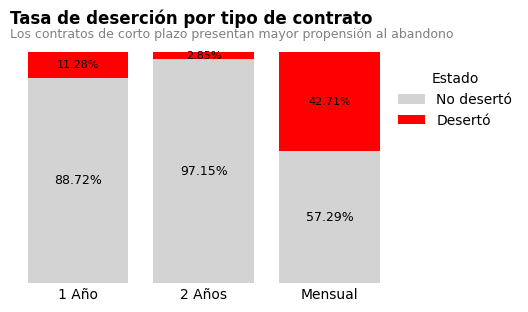

In [56]:
fig, ax = plt.subplots(figsize=(5,3))

# Valores
no_deserto = tipoContrato_propension['No Desertó']
deserto = tipoContrato_propension['Desertó']

# Barras apiladas
ax.bar(
    tipoContrato_propension.index,
    no_deserto,
    color='lightgray',
    label='No desertó'
)

ax.bar(
    tipoContrato_propension.index,
    deserto,
    bottom=no_deserto,
    color='red',
    label='Desertó'
)

# Estilo ejecutivo
ax.set_frame_on(False)
ax.set_ylim(0, 1)
#ax.set_yticks([0, 0.5, 1])
#ax.set_yticklabels(['0%', '50%', '100%'])
ax.yaxis.set_visible(False)                    # Oculta el eje y completo
ax.tick_params(axis='y', which='both', size=0) # Quitamos los ticks del eje Y
ax.tick_params(axis='x', which='both', size=0) # Quitamos los ticks del eje Y

ax.set_title(
    'Tasa de deserción por tipo de contrato',
    loc='left',
    weight='bold',
    pad=20
)

ax.text(
    0.0, 1.06,
    'Los contratos de corto plazo presentan mayor propensión al abandono',
    transform=ax.transAxes,
    ha='left',
    fontsize=9,
    color='gray'
)

for i, perfil in enumerate(tipoContrato_propension.index):
    ax.text(
        i,
        # Posición Y: Mitad de la barra 'Desertó'
        no_deserto.iloc[i] + deserto.iloc[i] / 2,
        # Texto: Porcentaje de 'Desertó'
        f'{deserto.iloc[i]*100:.2f}%',
        ha='center',
        va='center',
        fontsize=8,
        color='black',
        #weight='bold'
    )

    # 2. Etiquetas de "No Desertó"
    ax.text(
        i,
        # Posición Y: Mitad de la barra 'No Desertó'
        no_deserto.iloc[i] / 2,
        # Texto: Porcentaje de 'No Desertó'
        f'{no_deserto.iloc[i]*100:.2f}%',
        ha='center',
        va='center',
        fontsize=9,
        color='black', # Color negro para contraste
    )


ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.legend(title='Estado', frameon=False, bbox_to_anchor=(0.95, 1), loc='upper left', borderaxespad=1.)

plt.show()

### ¿Cual es la propensión a la deserción por método de pago?

In [58]:
metodoPago_propension = (
    df.groupby('Metodo_Pago')['Desercion']
      .value_counts(normalize=True)
      .unstack()
)

#pareja_propension.index = pareja_propension.index.map({
    #0: 'Sin Pareja',
    #1: 'Con Pareja'
#})

metodoPago_propension.columns = ['No Desertó', 'Desertó']

metodoPago_propension

,No Desertó,Desertó
Metodo_Pago,,
Cheque Electrónico,0.547146,0.452854
Cheque por Correo,0.80798,0.19202
Tarjeta de Crédito,0.847469,0.152531
Transferencia Bancaria,0.832685,0.167315


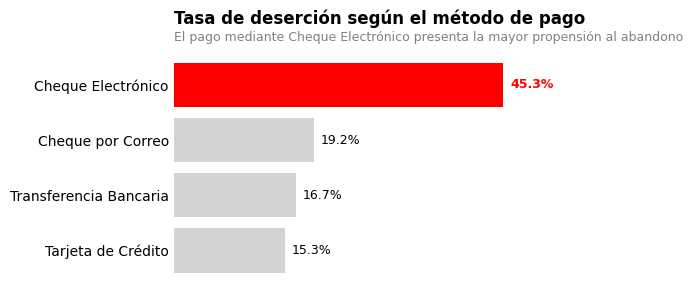

In [65]:
from matplotlib.colors import Normalize
fig, ax = plt.subplots(figsize=(5,3))

# Datos: SOLO desertores
deserto = metodoPago_propension['Desertó'].sort_values(ascending=True)

# Colores (resaltamos el máximo)
colors = [
    'red' if v == deserto.max() else 'lightgray'
    for v in deserto
]

# Barras horizontales
ax.barh(
    deserto.index,
    deserto.values,
    color=colors
)

# Estilo ejecutivo
ax.set_frame_on(False)
ax.set_xlim(0, deserto.max() + 0.08)

ax.xaxis.set_visible(False)
ax.tick_params(axis='x', which='both', size=0)
ax.tick_params(axis='y', which='both', size=0)

# Título
ax.set_title(
    'Tasa de deserción según el método de pago',
    loc='left',
    weight='bold',
    pad=20
)

# Subtítulo
ax.text(
    0.0, 1.05,
    'El pago mediante Cheque Electrónico presenta la mayor propensión al abandono',
    transform=ax.transAxes,
    ha='left',
    fontsize=9,
    color='gray'
)

# Etiquetas de porcentaje
for i, v in enumerate(deserto.values):
    ax.text(
        v + 0.01,
        i,
        f'{v*100:.1f}%',
        va='center',
        fontsize=9,
        color='red' if v == deserto.max() else 'black',
        weight='bold' if v == deserto.max() else 'normal'
    )

plt.show()


#📄Informe final